# Week 5 in-class Demos

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Example Geospatial Temperature Data 
data = np.array([
    [
        [20, 21.5, 22, 19.5, 20],
        [18, 17.5, 19, 20, 20.5]
    ],[
        [20.5, 21, 19.5, 23, 25.1],
        [19, 19, 20.5, 18.5, 18]
    ],[
        [23.5, 24, 22, 22, 25],
        [23, 25, 24, 22.5, 21.5]
    ]
])

print(data.shape) # Shape of data is (time, latitude, longitude)
print(data.ndim)

(3, 2, 5)
3


In [18]:
# Let's grab the temperatures at time = 6 (index = 1), latitude = 31 (index = 1), and longitude = 30 (index = 2) 
temp_sel = data[1, 1, 2]
print(temp_sel)

# How about the temperatures at time = 3 (index = 0), latitude = 30 (index = 0), and ALL longitudes?
temp_sel1 = data[0, 0, :]
print(temp_sel1) # Shape should now be a 1D array of 5 values (columns = longitudes)

# What about temperatures at all times, all latitudes, and longitude = 32 (index = 4)?
temp_sel2 = data[:, :, 4]
print(temp_sel2) # Shape should be 2D array of dimensions (time, latitude) selected at longitude = 32

20.5
[20.  21.5 22.  19.5 20. ]
[[20.  20.5]
 [25.1 18. ]
 [25.  21.5]]


In [19]:
# Let's convert from Celsius to fahrenheit using mapping

temps_f = data * 9/5 + 32 # Since our data array is all temp values, we can just use numpy's vectorization on all the elements!
temps_f

array([[[68.  , 70.7 , 71.6 , 67.1 , 68.  ],
        [64.4 , 63.5 , 66.2 , 68.  , 68.9 ]],

       [[68.9 , 69.8 , 67.1 , 73.4 , 77.18],
        [66.2 , 66.2 , 68.9 , 65.3 , 64.4 ]],

       [[74.3 , 75.2 , 71.6 , 71.6 , 77.  ],
        [73.4 , 77.  , 75.2 , 72.5 , 70.7 ]]])

In [20]:
# But what if only some of the data values were temps and the other values were time and longitude?
# New shape is 2-dimensions (measurement, values) in the order of [time, latitude, longitude, temperature]
data_new = np.array([
    [3, 30, 78, 20.0],
    [3, 30, 79, 21.5],
    [3, 30, 80, 22.0],
    [3, 30, 81, 19.5],
    [3, 30, 82, 20.0],
    [3, 31, 78, 18.0],
    [3, 31, 79, 17.5],
    [3, 31, 80, 19.0],
    [3, 31, 81, 20.0],
    [3, 31, 82, 20.5],
    [6, 30, 78, 20.5],
    [6, 30, 79, 21.0],
    [6, 30, 80, 19.5],
    [6, 30, 81, 23.0],
    [6, 30, 82, 25.1],
    [6, 31, 78, 19.0],
    [6, 31, 79, 19.0],
    [6, 31, 80, 20.5],
    [6, 31, 81, 18.5],
    [6, 31, 82, 18.0],
    [9, 30, 78, 23.5],
    [9, 30, 79, 24.0],
    [9, 30, 80, 22.0],
    [9, 30, 81, 22.0],
    [9, 30, 82, 25.0],
    [9, 31, 78, 23.0],
    [9, 31, 79, 25.0],
    [9, 31, 80, 24.0],
    [9, 31, 81, 22.5],
    [9, 31, 82, 21.5]
])
print(data_new.shape)

(30, 4)


In [21]:
# Now, to convert to fahrenheit, we only want to perform operations on the last column (temp), and leave the first three the same

mult = [1, 1, 1, 9/5] # multiplies time, lat, and lon by 1 (keeps the same) and only temp by 9/5 (last index)
offset = [0, 0, 0, 32] # Adds 0 to time, lat and lon to keep the same and adds 32 to temp for °F (last index)

data_new_f = data_new * mult + offset # Only performing element wise operations on the last column based on how we set up math arrays above

print(data_new_f) # Updated 2D array in °F!

[[ 3.   30.   78.   68.  ]
 [ 3.   30.   79.   70.7 ]
 [ 3.   30.   80.   71.6 ]
 [ 3.   30.   81.   67.1 ]
 [ 3.   30.   82.   68.  ]
 [ 3.   31.   78.   64.4 ]
 [ 3.   31.   79.   63.5 ]
 [ 3.   31.   80.   66.2 ]
 [ 3.   31.   81.   68.  ]
 [ 3.   31.   82.   68.9 ]
 [ 6.   30.   78.   68.9 ]
 [ 6.   30.   79.   69.8 ]
 [ 6.   30.   80.   67.1 ]
 [ 6.   30.   81.   73.4 ]
 [ 6.   30.   82.   77.18]
 [ 6.   31.   78.   66.2 ]
 [ 6.   31.   79.   66.2 ]
 [ 6.   31.   80.   68.9 ]
 [ 6.   31.   81.   65.3 ]
 [ 6.   31.   82.   64.4 ]
 [ 9.   30.   78.   74.3 ]
 [ 9.   30.   79.   75.2 ]
 [ 9.   30.   80.   71.6 ]
 [ 9.   30.   81.   71.6 ]
 [ 9.   30.   82.   77.  ]
 [ 9.   31.   78.   73.4 ]
 [ 9.   31.   79.   77.  ]
 [ 9.   31.   80.   75.2 ]
 [ 9.   31.   81.   72.5 ]
 [ 9.   31.   82.   70.7 ]]


In [12]:
# Take the mean over time:
time_mean = np.mean(data, axis = 0)
print(time_mean)
print(time_mean.shape) # Should be (2, 5) because we "got rid of" time dimension

[[21.33333333 22.16666667 21.16666667 21.5        23.36666667]
 [20.         20.5        21.16666667 20.33333333 20.        ]]
(2, 5)


# PollEV 1
## What dimension is left after the following code?

In [13]:
# Want time mean values at one latitude but include the longitudes:
lat_time_mean = time_mean[1, :]
print(lat_time_mean)
print(lat_time_mean.shape) # Should now just be longitude dimension

[20.         20.5        21.16666667 20.33333333 20.        ]
(5,)


In [14]:
longitudes = np.arange(78, 78 + len(lat_time_mean), 1) # Let's create a longitude array of the same size as our mean
print(longitudes)

[78 79 80 81 82]


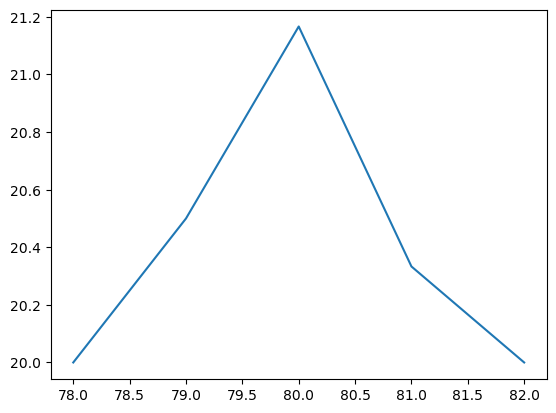

In [15]:
fig = plt.figure() # The easel
ax = fig.add_subplot() # The blank canvas

ax.plot(longitudes, lat_time_mean) # The actual paint on the canvas

plt.show(fig) # The full art piece

In [16]:
# What is the maximum temperature and where in longitude does it occur?
max_index = np.argmax(lat_time_mean)
max_temp = np.max(lat_time_mean)
max_lon = longitudes[max_index]
print(max_lon)
print(max_temp)

80
21.166666666666668


In [17]:
# Another way to use np.argmax and np.max but directly on the 3D dataset!
max_index_full = np.argmax(data) 
max_temp_full = np.max(data)
print(max_index_full) # How does an index of 14 come out of a 3D dataset with shape (3, 2, 5)?
print(max_temp_full)
print(data.flatten()[14])

14
25.1
25.1


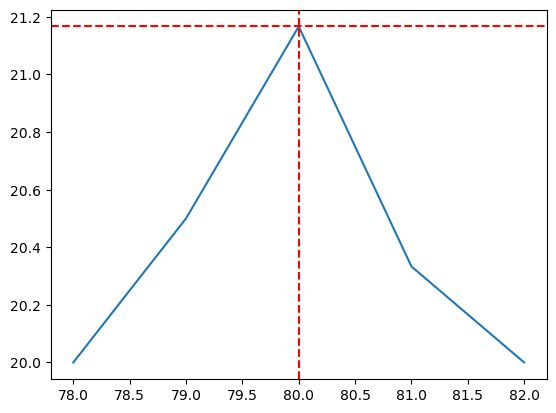

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(longitudes, lat_time_mean)
ax.axvline(x = max_lon, color = 'r', ls = '--')
ax.axhline(y = max_temp, color = 'r', ls = '--')

plt.show(fig)

In [10]:
x = np.linspace(1, 100, 100)
y1 = np.random.rand(100)
y2 = np.sin(x)

# Think Pair Share:
## How would you improve the readability of this plot?

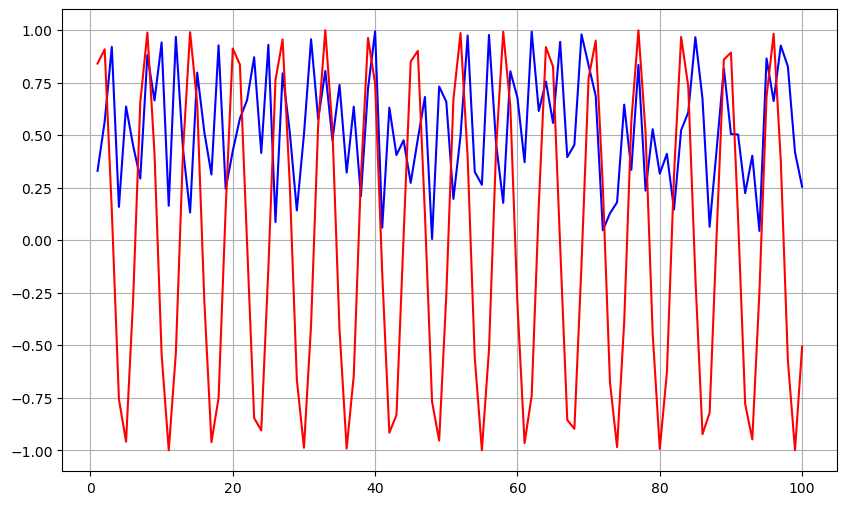

In [11]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot()
ax.plot(x, y1, c = 'b', label = 'Line 1')
ax.plot(x, y2, c = 'r', label = 'Line 2')
# ax.set_xlabel('X Values [Units]') # Add x label
# ax.set_ylabel('Y Values [Units]') # Add y label
# ax.set_title('Title of This Plot') # Add title
# ax.set_ylim(-1.1, 1.3) # Add ylim to give space for legend
# ax.axhline(y = 0, c = 'k', ls = '--') # Origin line
# ax.legend() 
ax.grid()
plt.show(fig)

In [12]:
y1_mean = np.mean(y1)
y2_mean = np.mean(y2)

# Think Pair Share
## How would you improve this plot?

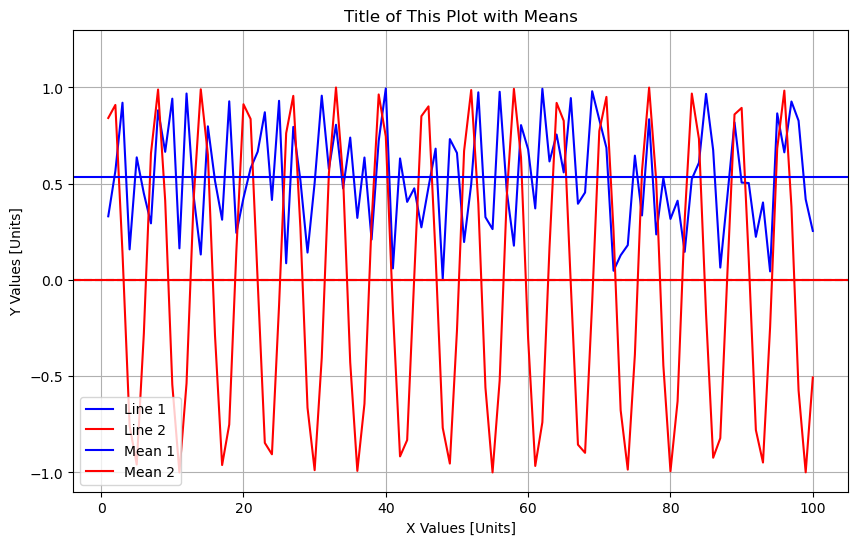

In [13]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot()

ax.plot(x, y1, c = 'b', label = 'Line 1')
ax.plot(x, y2, c = 'r', label = 'Line 2')
# plt.plot(x, y1, c = 'b', label = 'Line 1', alpha = 0.5) # Making Transparent
# plt.plot(x, y2, c = 'r', label = 'Line 2', alpha = 0.5) # Making Transparent
ax.set_xlabel('X Values [Units]') # Add x label
ax.set_ylabel('Y Values [Units]') # Add y label
ax.set_title('Title of This Plot with Means') # Add title
ax.set_ylim(-1.1, 1.3) # Add ylim to give space for legend
ax.axhline(y = 0, c = 'k', ls = '--') # Origin line
ax.axhline(y = y1_mean, c = 'b', label = 'Mean 1') # Could change color, line style...
ax.axhline(y = y2_mean, c = 'r', label = 'Mean 2')
ax.legend() 
ax.grid()

plt.show(fig)

## Other types of plots:

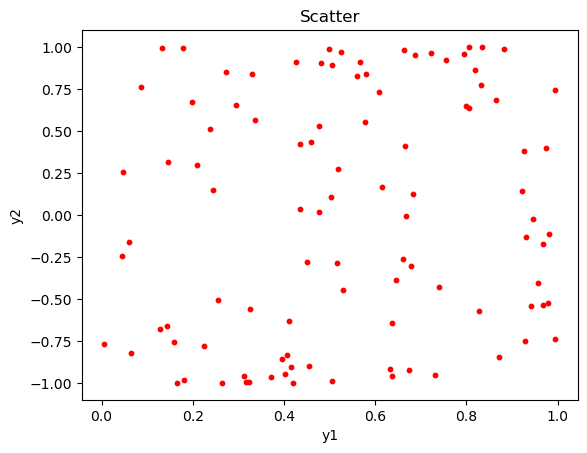

In [14]:
# Scatterplot: Often used to show relationship between two variables
fig = plt.figure() 
ax = fig.add_subplot()

ax.scatter(y1, y2, c = 'r', s = 10)
ax.set_title('Scatter')
ax.set_ylabel('y2')
ax.set_xlabel('y1')

plt.show(fig)

# PollEV 2

## What input parameter can you use to label each bar? (HINT: Use matplotlib documentation)

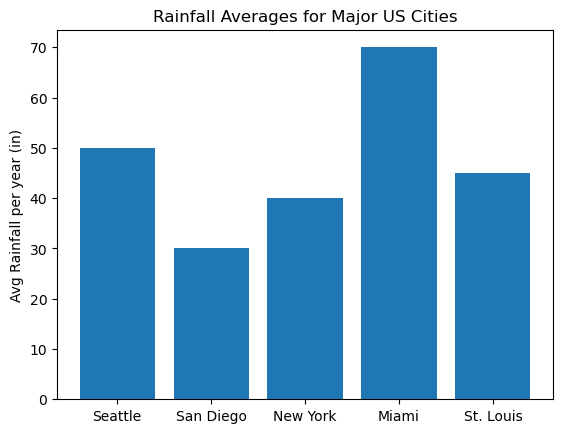

In [18]:
labels = ['Seattle', 'San Diego', 'New York', 'Miami', 'St. Louis']
rain = [50, 30 , 40, 70, 45]

fig = plt.figure()
ax = fig.add_subplot()

ax.bar(np.arange(len(labels)), rain, tick_label = labels)
# Or
# ax.bar(labels, rain)
ax.set_ylabel('Avg Rainfall per year (in)')
ax.set_title('Rainfall Averages for Major US Cities')

plt.show(fig)

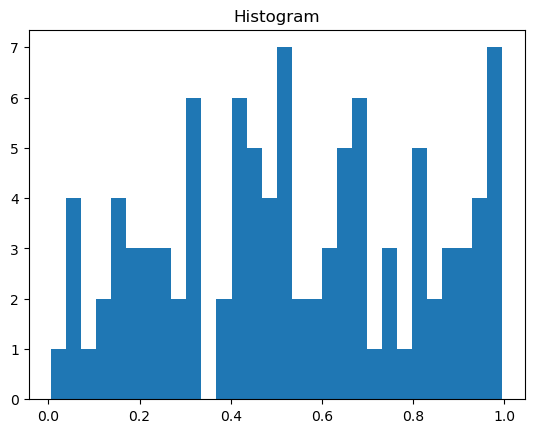

In [16]:
fig = plt.figure() # Move this down
ax = fig.add_subplot()

ax.hist(y1, bins = 30)
ax.set_title('Histogram')

plt.show(fig)

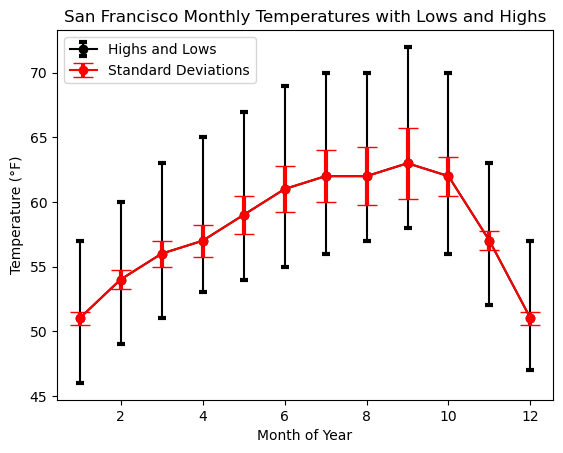

In [17]:
sf_temps = np.array([51, 54, 56, 57, 59, 61, 62, 62, 63, 62, 57, 51]) # Mean monthly temps of SF
sf_low = np.array([46, 49, 51, 53, 54, 55, 56, 57, 58, 56, 52, 47]) # Monthly Lows
sf_high = np.array([57, 60, 63, 65, 67, 69, 70, 70, 72, 70, 63, 57]) # Monthly Highs
months = np.arange(1, 13)
sf_stdevs = np.array([2, 3, 4, 5, 6, 7, 8, 9, 11, 6, 3, 2])/4 # Monthly standard deviations

temp_yerr = np.zeros((2, 12)) # Initialize 2x12 array to feed into errorbar
temp_yerr[0,:] = sf_temps - sf_low # Low limit
temp_yerr[1,:] = sf_high - sf_temps # High limit

fig = plt.figure()
ax = fig.add_subplot()

ax.errorbar(months, sf_temps, yerr = temp_yerr, capsize = 3, capthick = 3, marker = 'o', color = 'k', label = 'Highs and Lows')
ax.errorbar(months, sf_temps, yerr = sf_stdevs, capsize = 7, elinewidth = 3, marker = 'o', color = 'r', label = 'Standard Deviations')
ax.set_xlabel('Month of Year')
ax.set_ylabel('Temperature (°F)')
ax.set_title('San Francisco Monthly Temperatures with Lows and Highs')
ax.legend()

plt.show(fig)